In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sqlalchemy import create_engine
import psycopg2

In [8]:
# 1. Import it into a Python environment.
colnames=['sepal_length','sepal_width','petal_length','petal_width','class'] 
iris_df1 = pd.read_csv('iris.data',names=colnames, header=None)
iris_df2 = pd.read_csv('bezdekIris.data',names=colnames, header=None)
iris = pd.concat([iris_df1, iris_df2])
iris

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
# 2.1. Use Pandas to clean and transform the data.
# Concat two dataset to one dataset
iris = pd.concat([iris_df1, iris_df2])
iris

In [11]:
# Check vaule null
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [14]:
# 2.2. Generate summary statistics for three key variables
iris['class'].value_counts()
# --> iris is a balanced dataset as the number of data points for every class is same

class
Iris-setosa        100
Iris-versicolor    100
Iris-virginica     100
Name: count, dtype: int64

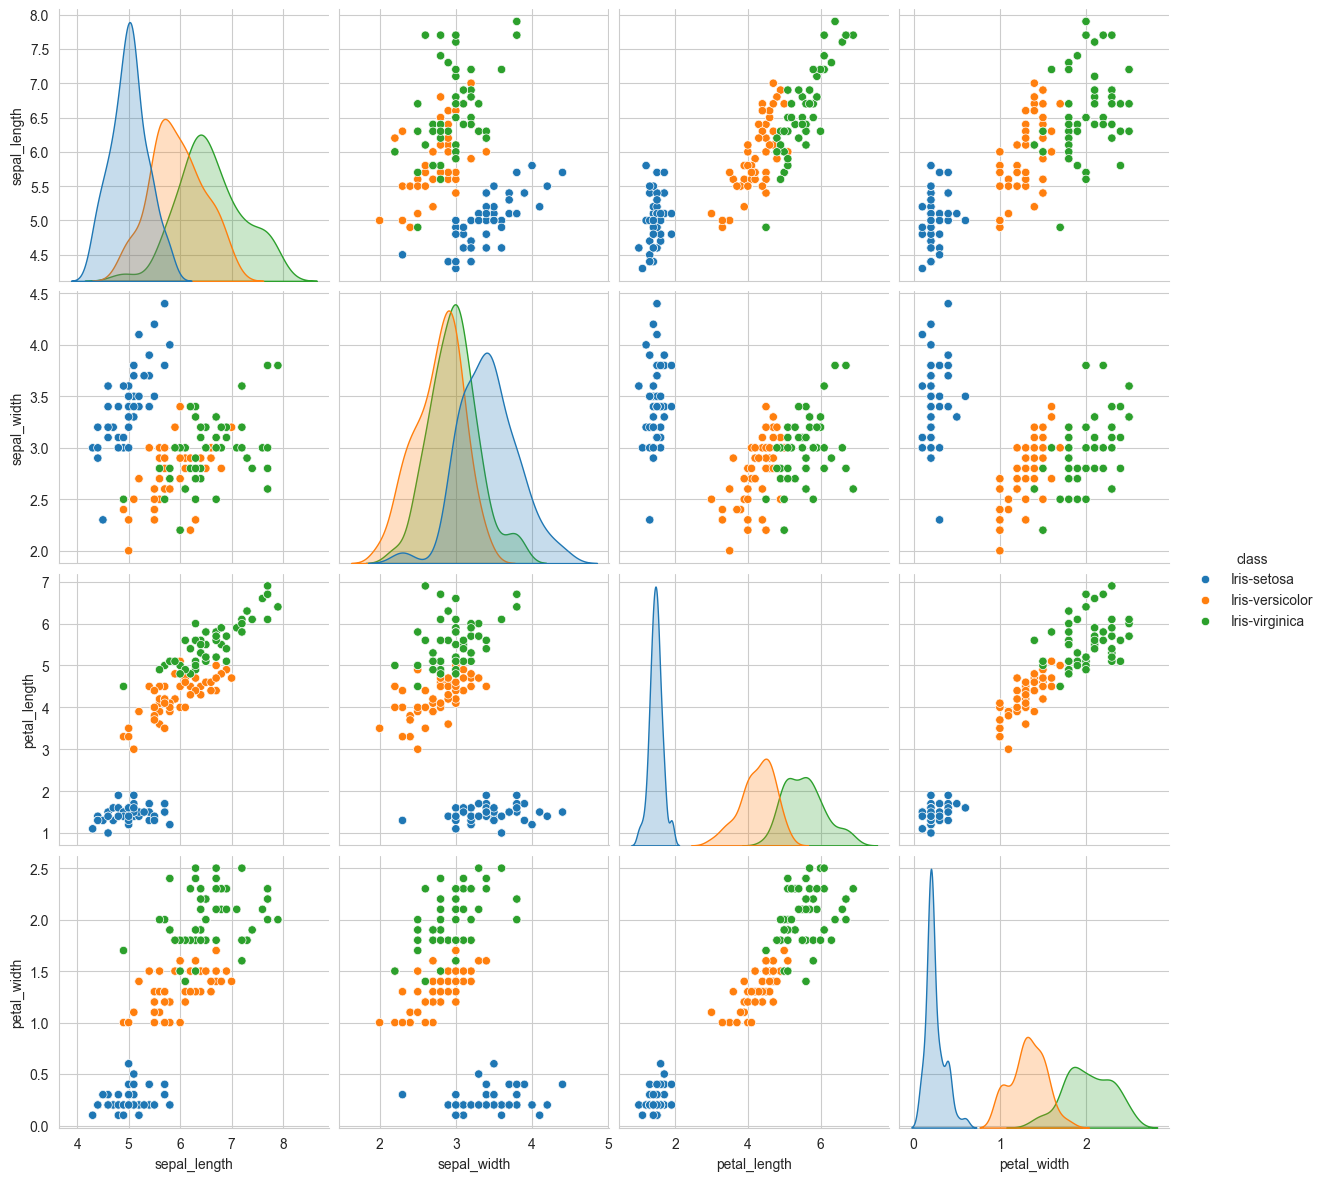

In [15]:
plt.close()
sns.set_style('whitegrid')
sns.pairplot(iris,hue='class',height=3);
plt.show()

obervation:
1. petal.lenght and petal.width are the most useful features to identify various flowers types.
2. While Sentosa can be easily identified(linearly seperable), Virnica and Versicolor have some overlap(almost linearly separable)
3. We can find "lines" and "if-else" conditions to build a simple model to classify the flower types.

3. Database Storage with PostgreSQL

3.1. Create a PostgreSQL database and table

* SQL schema

sepal_length: length of sepals	

sepal_width: width of sepals

petal_length: length of petals	

petal_width: width of petals	

class: classification of flowers

In [55]:
# 3.2. Store the cleaned dataset.
connection = psycopg2.connect(
    host="localhost",
    database="postgres",
    user="postgres",
    password="",
    port = 5432)

In [ ]:
import sqlalchemy as sa
df = pd.DataFrame(iris)
df.to_sql('data_iris', con=connection, if_exists='append', index=False)